In [80]:
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.colors as mcolor

import seaborn as sns

In [81]:
data = pd.read_csv('sales_data.csv')

In [82]:
print(data.head())
print(data.info())

         Date Region Salesperson      Product  Units Sold  Unit Price  \
0  2023-01-05  North       Alice  Electronics          10       120.5   
1  2023-01-07   East         Bob    Furniture           5       300.0   
2  2023-01-10   West     Charlie     Clothing          20        25.0   
3  2023-02-12  North       Alice  Electronics           7       120.5   
4  2023-02-15  South       Diana  Electronics           8       120.5   

   Total Sale  
0      1205.0  
1      1500.0  
2       500.0  
3       843.5  
4       964.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         16 non-null     object 
 1   Region       16 non-null     object 
 2   Salesperson  16 non-null     object 
 3   Product      16 non-null     object 
 4   Units Sold   16 non-null     int64  
 5   Unit Price   16 non-null     float64
 6   Total Sale   16 non-nu

In [83]:
print(data.isnull().sum())

Date           0
Region         0
Salesperson    0
Product        0
Units Sold     0
Unit Price     0
Total Sale     0
dtype: int64


In [84]:
data.head(10)

,Date,Region,Salesperson,Product,Units Sold,Unit Price,Total Sale
0,2023-01-05,North,Alice,Electronics,10,120.5,1205.0
1,2023-01-07,East,Bob,Furniture,5,300.0,1500.0
2,2023-01-10,West,Charlie,Clothing,20,25.0,500.0
3,2023-02-12,North,Alice,Electronics,7,120.5,843.5
4,2023-02-15,South,Diana,Electronics,8,120.5,964.0
5,2023-02-18,East,Bob,Furniture,3,350.0,1050.0
6,2023-03-10,West,Charlie,Clothing,25,22.5,562.5
7,2023-03-20,North,Eve,Furniture,4,275.0,1100.0
8,2023-04-02,South,Alice,Electronics,9,125.0,1125.0
9,2023-04-12,East,Diana,Clothing,15,35.0,525.0


In [85]:
total_sales_per_product = data.groupby('Product')['Total Sale'].sum()
print(total_sales_per_product)

Product
Clothing       2543.5
Electronics    6297.5
Furniture      8680.0
Name: Total Sale, dtype: float64


In [86]:
total_sales_per_region = data.groupby('Region')['Total Sale'].sum()

print(total_sales_per_region)

Region
East     3635.0
North    3544.5
South    5889.0
West     4452.5
Name: Total Sale, dtype: float64


In [87]:
top_3_sales_personel = data.groupby('Salesperson')['Total Sale'].sum().sort_values(ascending=False).head(3)

print(top_3_sales_personel)

Salesperson
Bob      4506.0
Diana    4279.0
Alice    3733.5
Name: Total Sale, dtype: float64


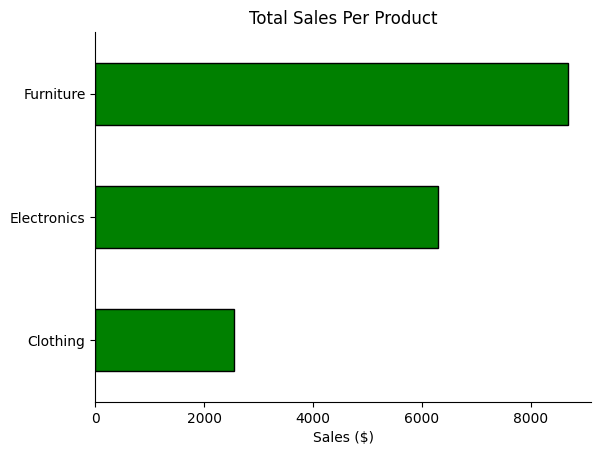

In [89]:
total_sales_per_product.plot(kind='barh', color='Green', edgecolor='black')
plt.title('Total Sales Per Product')
plt.xlabel('Sales ($)')
plt.ylabel('')
sns.despine()
plt.show()

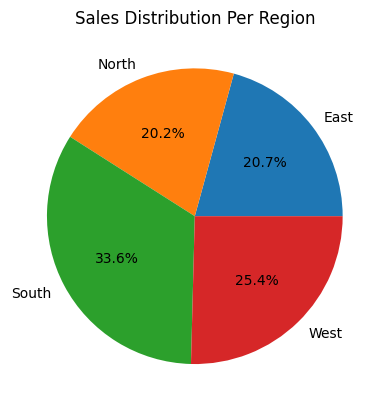

In [100]:
total_sales_per_region.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution Per Region')
plt.ylabel('')
plt.show()

In [101]:
data

,Date,Region,Salesperson,Product,Units Sold,Unit Price,Total Sale
0,2023-01-05,North,Alice,Electronics,10,120.5,1205.0
1,2023-01-07,East,Bob,Furniture,5,300.0,1500.0
2,2023-01-10,West,Charlie,Clothing,20,25.0,500.0
3,2023-02-12,North,Alice,Electronics,7,120.5,843.5
4,2023-02-15,South,Diana,Electronics,8,120.5,964.0
5,2023-02-18,East,Bob,Furniture,3,350.0,1050.0
6,2023-03-10,West,Charlie,Clothing,25,22.5,562.5
7,2023-03-20,North,Eve,Furniture,4,275.0,1100.0
8,2023-04-02,South,Alice,Electronics,9,125.0,1125.0
9,2023-04-12,East,Diana,Clothing,15,35.0,525.0


In [102]:
data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data['Date'].dt.to_period('M')

monthly_sales = data.groupby('Month')['Total Sale'].sum()

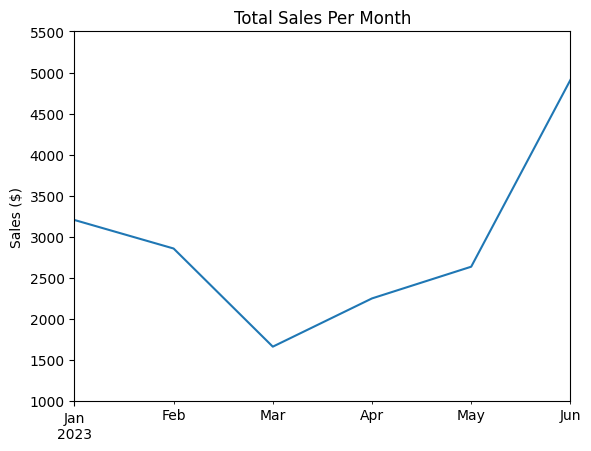

<Figure size 640x480 with 0 Axes>

In [124]:
monthly_sales.plot(kind='line')
plt.ylim(1000, 5500)
plt.title('Total Sales Per Month')
plt.ylabel('Sales ($)')
plt.xlabel('')
plt.show()